<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/b/b0/Logo_Universidad_Polit%C3%A9cnica_Salesiana_del_Ecuador.png" alt="Universidad Politécnica Salesiana" width="800">
</center>

# <font color="#2E86C1">Desarrollo e implementación de aplicaciones de cómputo paralelo para análisis de grandes volúmenes de datos usando procesamiento de lenguaje natural</font>

### <font color="#1ABC9C">**Ingeniería en Ciencias Computacionales**</font>

**Autor:** Kaar Joseph, Sebastián Andrade, Bryam Guachum <br>
**Universidad Politécnica Salesiana, sede Cuenca, Ecuador**

---

## Carga de librerías

In [438]:
# Librerías básicas
import pandas as pd
import numpy as np

# Librerías para preprocesamiento de texto
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Librerías para machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

print("Configuración inicial completada.")

Configuración inicial completada.


## Carga de Dataset

In [441]:
# Ruta del dataset
ruta_dataset = "comentarios_twitter_dropna.csv"

# Cargar dataset y mostrar estadísticas básicas
data = pd.read_csv(ruta_dataset, delimiter=';')
print(f"Dataset cargado con {len(data)} registros.")
data.head()

Dataset cargado con 958196 registros.


,comentario,etiqueta
0,Ni modo ándate a la verga broder,negativo
1,No callate y andate a la verga,negativo
2,andate a la verga cara de nalga cagada,negativo
3,Andate a la verga mentiroso hp,negativo
4,andate a la verga meEntiendes Esperemos que po...,negativo


## Información de dataset

In [443]:
print("\nInformación del dataset:")
print(data.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958196 entries, 0 to 958195
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   comentario  958196 non-null  object
 1   etiqueta    958196 non-null  object
dtypes: object(2)
memory usage: 14.6+ MB
None


## Limpieza de filas incosistentes

In [445]:
print("\nValores únicos en la columna 'etiqueta':")
print(data['etiqueta'].unique())


Valores únicos en la columna 'etiqueta':
['negativo' 'positivo']


In [446]:
# Distribución de etiquetas
print("Distribución de etiquetas:")
print(data['etiqueta'].value_counts())

Distribución de etiquetas:
etiqueta
negativo    542982
positivo    415214
Name: count, dtype: int64


In [447]:
# 1. Verificar valores nulos
print("\nCantidad de valores nulos antes de limpieza:")
print(data.isnull().sum())

data = data.dropna()


Cantidad de valores nulos antes de limpieza:
comentario    0
etiqueta      0
dtype: int64


In [448]:
# Eliminar filas con valores NaN en la columna 'etiqueta'
data = data.dropna(subset=['etiqueta'])

print("\nValores NaN después de la eliminación:", data['etiqueta'].isnull().sum())


Valores NaN después de la eliminación: 0


In [449]:
# 2. Eliminar filas duplicadas
print("\nCantidad de filas antes de eliminar duplicados:", len(data))
data = data.drop_duplicates()
print("Cantidad de filas después de eliminar duplicados:", len(data))


Cantidad de filas antes de eliminar duplicados: 958196
Cantidad de filas después de eliminar duplicados: 829505


In [450]:
# 3. Estandarizar etiquetas
# Convertir las etiquetas a valores binarios si no están en formato numérico
etiquetas_originales = data['etiqueta'].unique()
print("\nEtiquetas únicas antes de mapeo:", etiquetas_originales)

etiqueta_mapping = {'positivo': 1, 'negativo': 0}
data['etiqueta'] = data['etiqueta'].map(etiqueta_mapping)

etiquetas_despues = data['etiqueta'].unique()
print("Etiquetas únicas después de mapeo:", etiquetas_despues)


Etiquetas únicas antes de mapeo: ['negativo' 'positivo']
Etiquetas únicas después de mapeo: [0 1]


## Limpieza de Texto - Columa Comentario

In [453]:
# 4. Eliminar caracteres innecesarios en los comentarios
import re

def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r"http\S+", "", texto)  # Eliminar URLs
    texto = re.sub(r"@\w+", "", texto)  # Eliminar menciones
    texto = re.sub(r"[^a-zA-Záéíóúüñ\s]", "", texto)  # Eliminar caracteres especiales
    texto = re.sub(r"\s+", " ", texto).strip()  # Eliminar espacios extra
    return texto

data['comentario'] = data['comentario'].apply(limpiar_texto)

print("\nCantidad de valores nulos después de limpieza:")
print(data.isnull().sum())

print("\nPrimeras filas del dataset limpio:")
print(data.head())


Cantidad de valores nulos después de limpieza:
comentario    0
etiqueta      0
dtype: int64

Primeras filas del dataset limpio:
                                          comentario  etiqueta
0                   ni modo ándate a la verga broder         0
1                     no callate y andate a la verga         0
2             andate a la verga cara de nalga cagada         0
3                     andate a la verga mentiroso hp         0
4  andate a la verga meentiendes esperemos que po...         0


## Visualización de distribución final

Conteo total de etiquetas:
etiqueta
0    471819
1    357686
Name: count, dtype: int64
Total: 829505


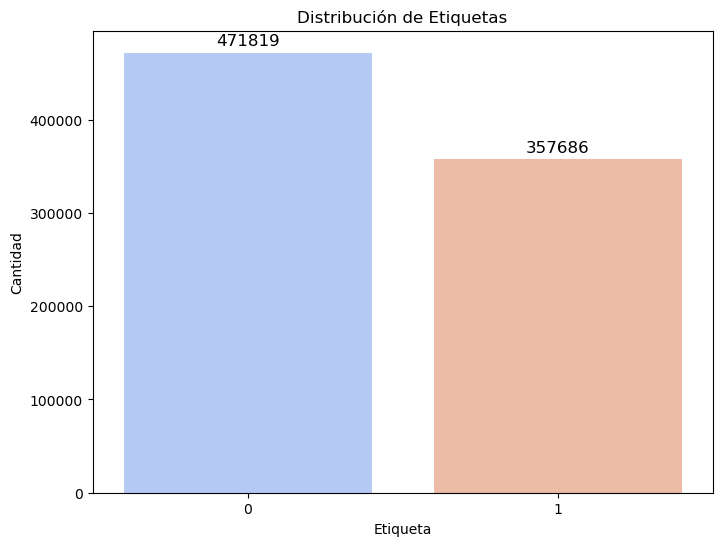

In [459]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de cada etiqueta
etiquetas_conteo = data['etiqueta'].value_counts()

# Imprimir el total de etiquetas
print("Conteo total de etiquetas:")
print(etiquetas_conteo)
print(f"Total: {etiquetas_conteo.sum()}")

# Crear el gráfico
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x='etiqueta', hue='etiqueta', palette='coolwarm', dodge=False, legend=False)

# Agregar los números encima de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Distribución de Etiquetas")
plt.xlabel("Etiqueta")
plt.ylabel("Cantidad")
plt.show()

In [461]:
from sklearn.model_selection import train_test_split

# 1. Definir variables independientes 
X = data['comentario']  
y = data['etiqueta']    

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Verificar las proporciones
print("\nDistribución de etiquetas en el conjunto original:")
print(data['etiqueta'].value_counts(normalize=True))

print("\nDistribución de etiquetas en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nDistribución de etiquetas en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))

# Confirmación de tamaños
print("\nTamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))


Distribución de etiquetas en el conjunto original:
etiqueta
0    0.568796
1    0.431204
Name: proportion, dtype: float64

Distribución de etiquetas en el conjunto de entrenamiento:
etiqueta
0    0.568796
1    0.431204
Name: proportion, dtype: float64

Distribución de etiquetas en el conjunto de prueba:
etiqueta
0    0.568797
1    0.431203
Name: proportion, dtype: float64

Tamaño del conjunto de entrenamiento: 663604
Tamaño del conjunto de prueba: 165901


## Procesamiento de texto - Vectorización - NLTK Tokenización

In [463]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Obtener stopwords en español
stopwords_spanish = stopwords.words('spanish')

# Crear el vectorizador TF-IDF con las stopwords en español
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words=stopwords_spanish)

# Ajustar y transformar los datos de entrenamiento
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transformar los datos de prueba
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Ver el tamaño de las matrices resultantes
print("\nDimensiones de la matriz de características del conjunto de entrenamiento:", X_train_tfidf.shape)
print("Dimensiones de la matriz de características del conjunto de prueba:", X_test_tfidf.shape)


Dimensiones de la matriz de características del conjunto de entrenamiento: (663604, 5000)
Dimensiones de la matriz de características del conjunto de prueba: (165901, 5000)


## ENTRENAMIENTO DE MODELO POR REGRESIÓN LOGÍSTICA

Accuracy: 0.926866022507399

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94     94364
           1       0.91      0.92      0.92     71537

    accuracy                           0.93    165901
   macro avg       0.93      0.93      0.93    165901
weighted avg       0.93      0.93      0.93    165901


Matriz de Confusión:
[[88225  6139]
 [ 5994 65543]]


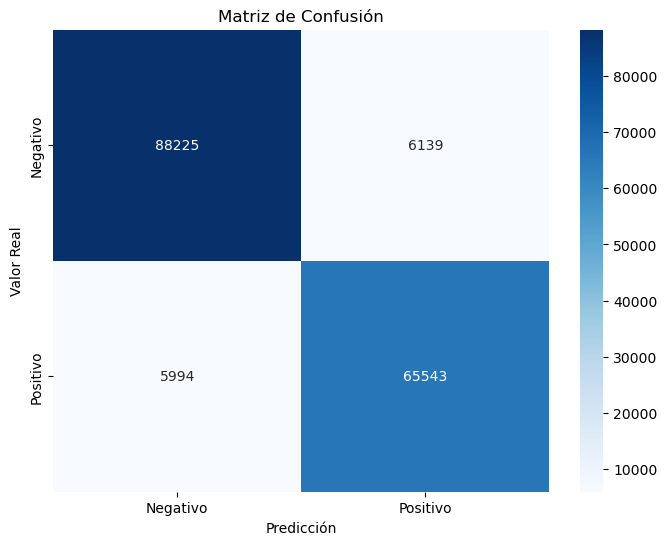

In [467]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Crear el modelo de regresión logística
model = LogisticRegression()

# 2. Entrenar el modelo
model.fit(X_train_tfidf, y_train)

# 3. Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test_tfidf)

# 4. Evaluar el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# 5. Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(cm)

# 6. Graficar la matriz de confusión
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

## GUARDAR MODELO

In [469]:
import joblib

# 1. Guardar el modelo entrenado
joblib.dump(model, 'modelo_sentimientos.pkl')
print("Modelo guardado como 'modelo_sentimientos.pkl'")

Modelo guardado como 'modelo_sentimientos.pkl'


In [470]:
# 2. Cargar el modelo guardado (cuando sea necesario en el futuro)
loaded_model = joblib.load('modelo_sentimientos.pkl')
print("Modelo cargado correctamente")

Modelo cargado correctamente


## NUEVA PREDICCÓN DE COMENTARIO

In [472]:
# 3. PREDICCIÓN DE COMENTARIO
nuevo_comentario = ["La IA me parece una mrd :v"]
nuevo_comentario_tfidf = tfidf_vectorizer.transform(nuevo_comentario)
prediccion = loaded_model.predict(nuevo_comentario_tfidf)
print(f"Predicción para el nuevo comentario: {'Positivo' if prediccion[0] == 1 else 'Negativo'}")

Predicción para el nuevo comentario: Negativo
